In [1]:
import pandas as pd 
df = pd.read_csv("..//static//csv//heart_2020_cleaned.csv")
print(df.columns)

display(df.head(10))

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')


HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   
5          Yes  28.87     Yes              No     No             6.0   
6           No  21.63      No              No     No            15.0   
7           No  31.64     Yes              No     No             5.0   
8           No  26.45      No              No     No             0.0   
9           No  40.69      No              No     No             0.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race  \
0          30.0          No  Female        55-59  White   
1           0.0          No  Female  80 or older  White   
2          30.0          No    Male        65-69  White   
3           0.0          No  Female        75-79  White   
4           0.0         Yes  Female        40-44  White   
5           0.0         Yes  Female        75-79  Black   
6           0.0          No  Female        70-74  White   
7           0.0         Yes  Female  80 or older  White   
8           0.0          No  Female  80 or older  White   
9           0.0         Yes    Male        65-69  White   

                  Diabetic PhysicalActivity  GenHealth  SleepTime Asthma  \
0                      Yes              Yes  Very good        5.0    Yes   
1                       No              Yes  Very good        7.0     No   
2                      Yes              Yes       Fair        8.0    Yes   
3                       No               No       Good        6.0     No   
4                       No              Yes  Very good        8.0     No   
5                       No               No       Fair       12.0     No   
6                       No              Yes       Fair        4.0    Yes   
7                      Yes               No       Good        9.0    Yes   
8  No, borderline diabetes               No       Fair        5.0     No   
9                       No              Yes       Good       10.0     No   

  KidneyDisease SkinCancer  
0            No        Yes  
1            No         No  
2            No         No  
3            No        Yes  
4            No         No  
5            No         No  
6            No        Yes  
7            No         No  
8           Yes         No  
9            No         No

Сегментация пациентов по рискам сердечно-сосудистых заболеваний
Цель: Определить группы пациентов с различными уровнями риска развития сердечно-сосудистых заболеваний на основе их демографических данных, образа жизни и состояния здоровья.

Пример:

Кластер 1: Пациенты с высоким риском (курение, высокий ИМТ, низкая физическая активность).

Кластер 2: Пациенты со средним риском (умеренное курение, средний ИМТ, средняя физическая активность).

Кластер 3: Пациенты с низким риском (отсутствие вредных привычек, нормальный ИМТ, высокая физическая активность).

Бизнес-применение:

Разработка персонализированных программ профилактики и лечения для каждой группы пациентов.

Таргетированная реклама медицинских услуг и продуктов для улучшения образа жизни.

In [2]:
import pandas as pd

## почистила данные чут чут
df = pd.read_csv("..//static//csv//heart_2020_cleaned.csv").head(1000)
df = df.dropna()
from scipy import stats

# Вычисление z-score для числовых столбцов
z_scores = stats.zscore(df[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']])
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]
from sklearn.preprocessing import LabelEncoder

# Инициализация LabelEncoder
label_encoders = {}

# Кодирование категориальных переменных
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

from imblearn.over_sampling import RandomOverSampler

# Инициализация RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Выбор признаков и целевой переменной
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Применение RandomOverSampler
X_resampled, y_resampled = ros.fit_resample(X, y)

# Создание нового датасета с балансированными данными
df_balanced = X_resampled.copy()
df_balanced['HeartDisease'] = y_resampled

df = df_balanced


In [3]:
## стандартизация
scaler = StandardScaler()
df_encoded[numeric_features] = scaler.fit_transform(df_encoded[numeric_features])

NameError: name 'StandardScaler' is not defined

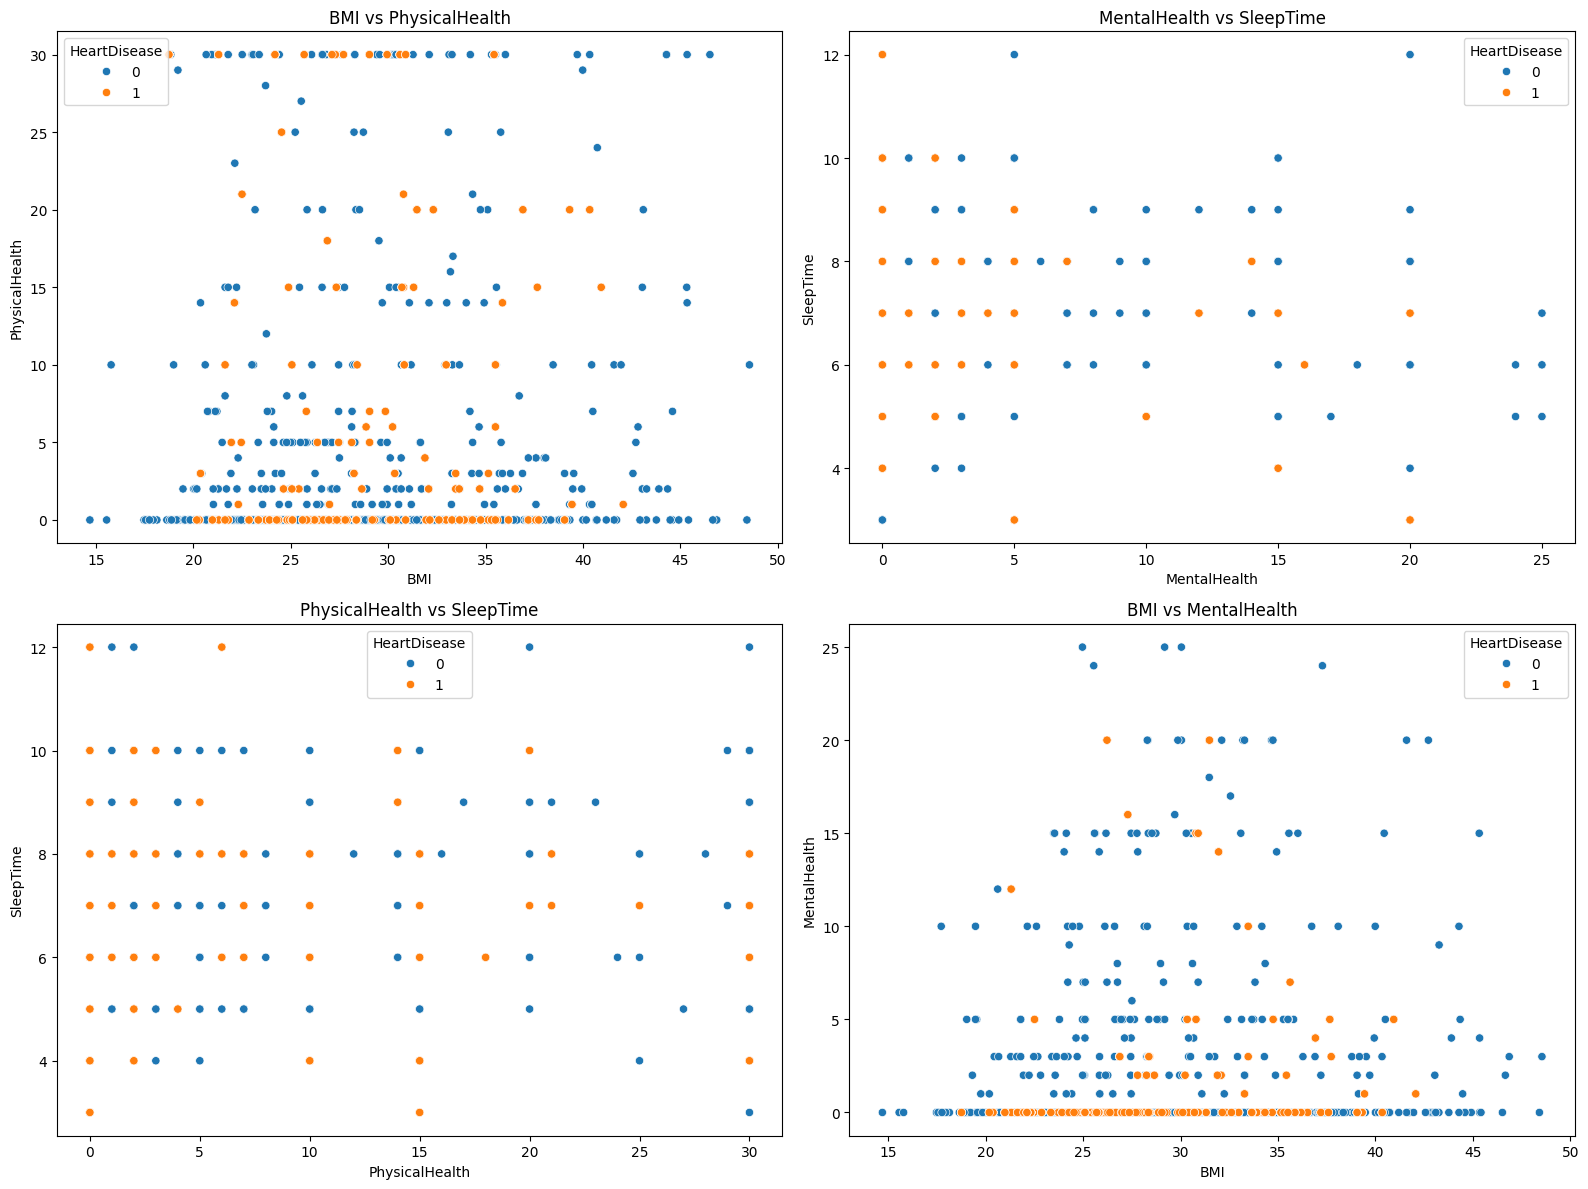

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Визуализация данных с учетом понимания их особенностей
plt.figure(figsize=(16, 12))

# Взаимодействие между BMI и PhysicalHealth
plt.subplot(2, 2, 1)
sns.scatterplot(x='BMI', y='PhysicalHealth', hue='HeartDisease', data=df)
plt.title('BMI vs PhysicalHealth')

# Взаимодействие между MentalHealth и SleepTime
plt.subplot(2, 2, 2)
sns.scatterplot(x='MentalHealth', y='SleepTime', hue='HeartDisease', data=df)
plt.title('MentalHealth vs SleepTime')

# Взаимодействие между PhysicalHealth и SleepTime
plt.subplot(2, 2, 3)
sns.scatterplot(x='PhysicalHealth', y='SleepTime', hue='HeartDisease', data=df)
plt.title('PhysicalHealth vs SleepTime')

# Сравнение зависимости BMI и MentalHealth
plt.subplot(2, 2, 4)
sns.scatterplot(x='BMI', y='MentalHealth', hue='HeartDisease', data=df)
plt.title('BMI vs MentalHealth')

plt.tight_layout()
plt.show()

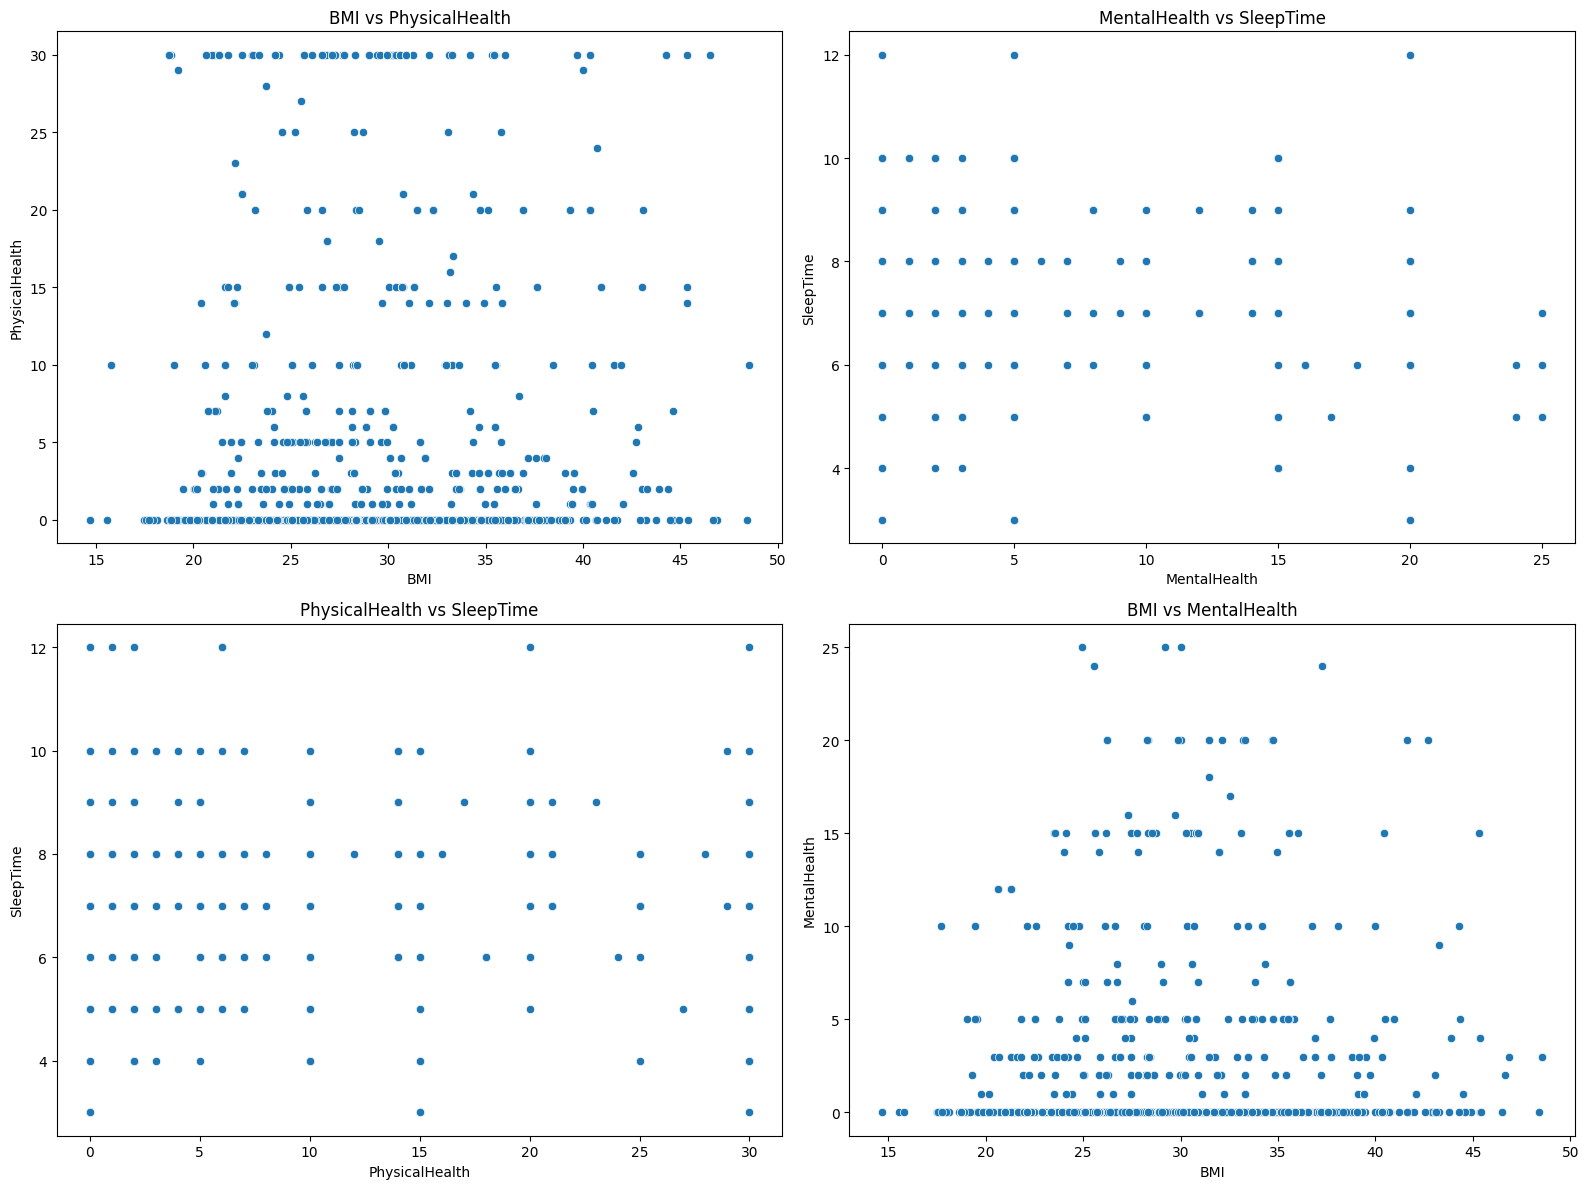

In [5]:
# Визуализация данных без учета понимания их особенностей
plt.figure(figsize=(16, 12))

# Взаимодействие между BMI и PhysicalHealth
plt.subplot(2, 2, 1)
sns.scatterplot(x='BMI', y='PhysicalHealth', data=df)
plt.title('BMI vs PhysicalHealth')

# Взаимодействие между MentalHealth и SleepTime
plt.subplot(2, 2, 2)
sns.scatterplot(x='MentalHealth', y='SleepTime', data=df)
plt.title('MentalHealth vs SleepTime')

# Взаимодействие между PhysicalHealth и SleepTime
plt.subplot(2, 2, 3)
sns.scatterplot(x='PhysicalHealth', y='SleepTime', data=df)
plt.title('PhysicalHealth vs SleepTime')

# Сравнение зависимости BMI и MentalHealth
plt.subplot(2, 2, 4)
sns.scatterplot(x='BMI', y='MentalHealth', data=df)
plt.title('BMI vs MentalHealth')

plt.tight_layout()
plt.show()

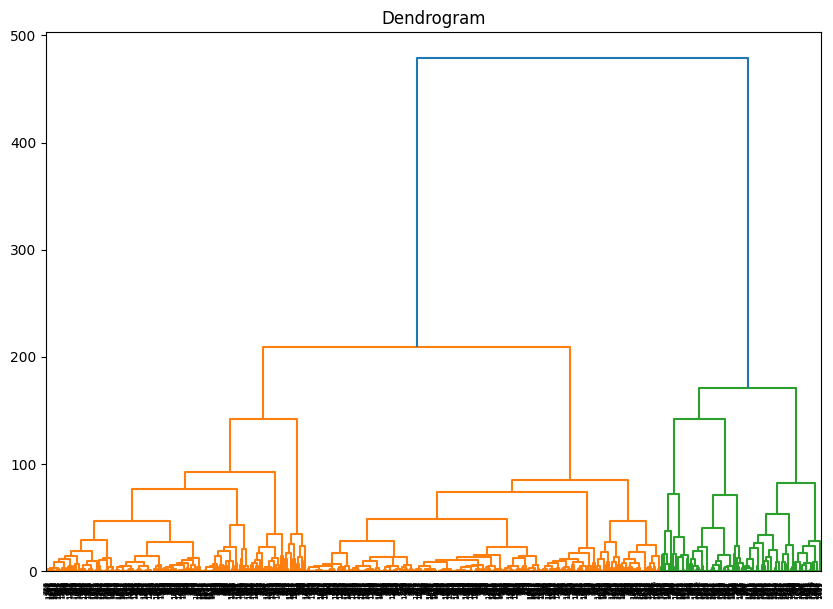

In [6]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Выбор признаков для кластеризации
X = df[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']]

# Применение агломеративной кластеризации
agg_clustering = AgglomerativeClustering(n_clusters=3)
clusters = agg_clustering.fit_predict(X)

# Добавление результатов кластеризации в датасет
df['Cluster'] = clusters

# Визуализация дендрограммы
linked = linkage(X, 'ward')

plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram')
plt.show()

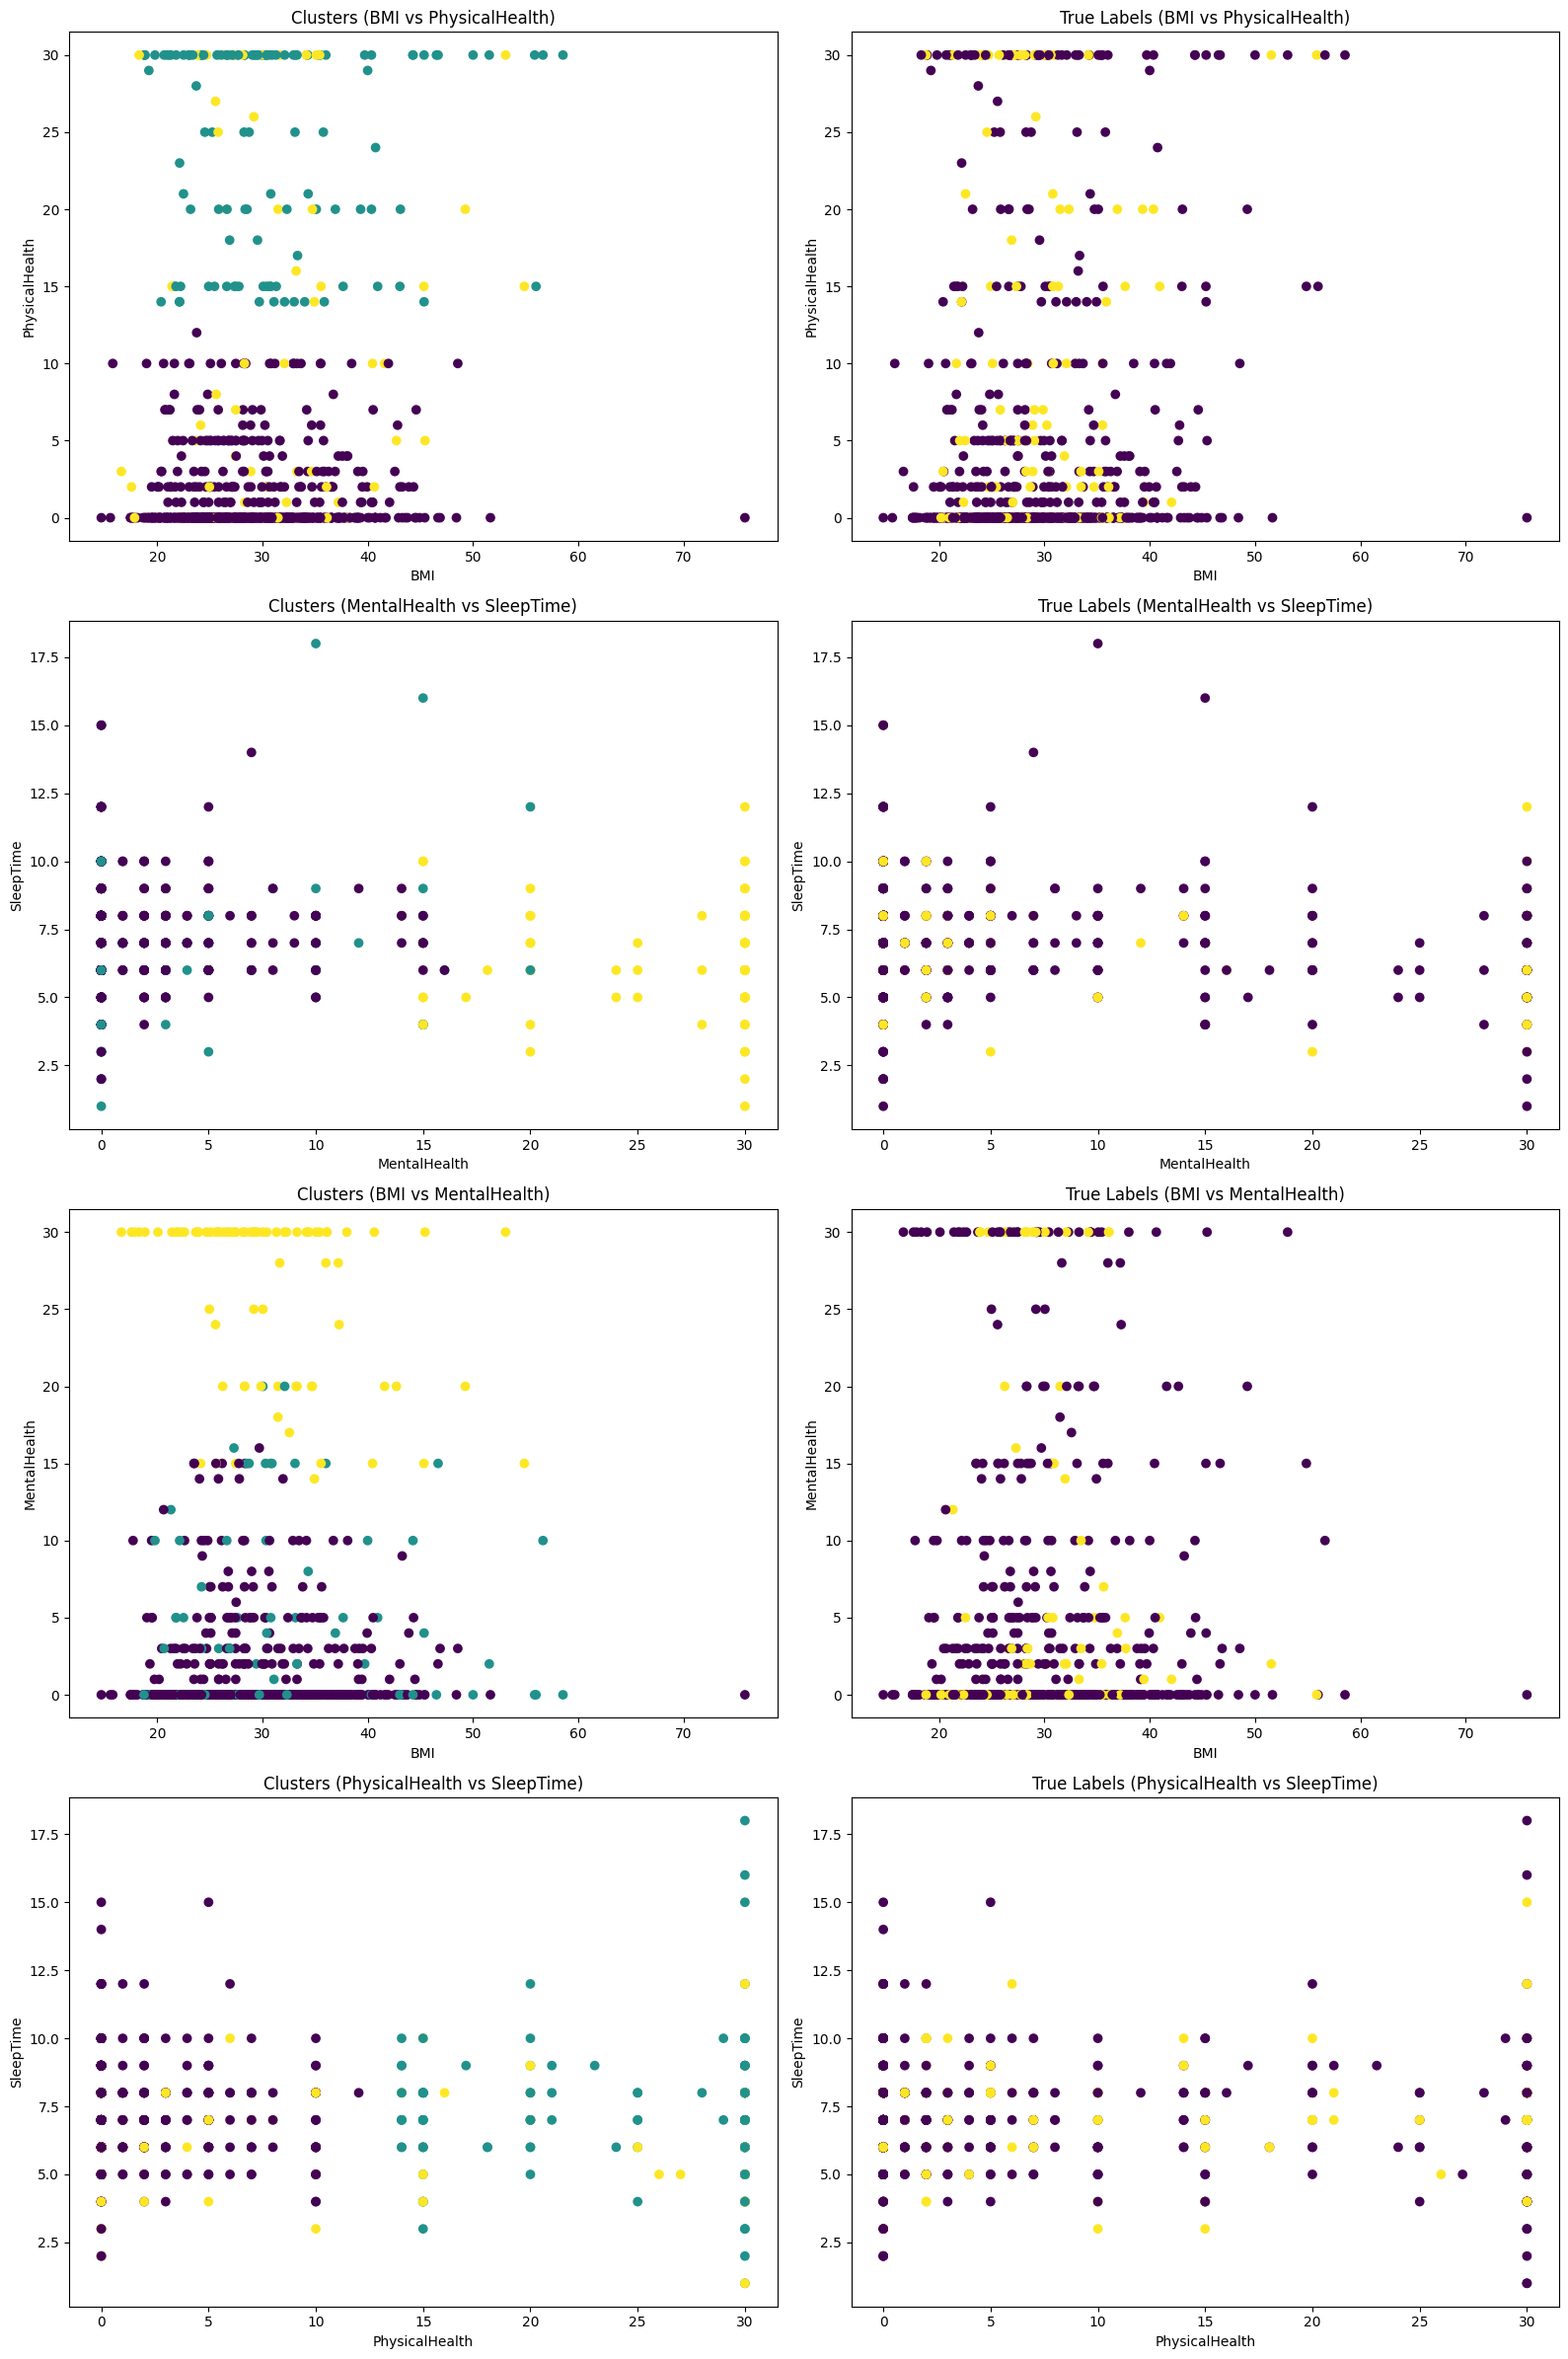

In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt

# Определение функции draw_data_2d
def draw_data_2d(data, feature_x, feature_y, labels, subplot):
    subplot.scatter(data.iloc[:, feature_x], data.iloc[:, feature_y], c=labels, cmap='viridis')
    subplot.set_xlabel(data.columns[feature_x])
    subplot.set_ylabel(data.columns[feature_y])

# Загрузка данных
df = pd.read_csv("..//static//csv//heart_2020_cleaned.csv").head(1000)

# Инициализация LabelEncoder
label_encoders = {}

# Кодирование категориальных переменных
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Выбор признаков для кластеризации
X = df[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']]

# Применение MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=3, random_state=0, batch_size=100)
result = kmeans.fit_predict(X)

# Визуализация результатов кластеризации и истинных меток
plt.figure(figsize=(16, 24))

# Визуализация кластеров на основе признаков 0 и 1
plt.subplot(4, 2, 1)
draw_data_2d(X, 0, 1, result, plt.subplot(4, 2, 1))
plt.title('Clusters (BMI vs PhysicalHealth)')

# Визуализация истинных меток на основе признаков 0 и 1
plt.subplot(4, 2, 2)
draw_data_2d(X, 0, 1, df['HeartDisease'], plt.subplot(4, 2, 2))
plt.title('True Labels (BMI vs PhysicalHealth)')

# Визуализация кластеров на основе признаков 2 и 3
plt.subplot(4, 2, 3)
draw_data_2d(X, 2, 3, result, plt.subplot(4, 2, 3))
plt.title('Clusters (MentalHealth vs SleepTime)')

# Визуализация истинных меток на основе признаков 2 и 3
plt.subplot(4, 2, 4)
draw_data_2d(X, 2, 3, df['HeartDisease'], plt.subplot(4, 2, 4))
plt.title('True Labels (MentalHealth vs SleepTime)')

# Визуализация кластеров на основе признаков 0 и 2
plt.subplot(4, 2, 5)
draw_data_2d(X, 0, 2, result, plt.subplot(4, 2, 5))
plt.title('Clusters (BMI vs MentalHealth)')

# Визуализация истинных меток на основе признаков 0 и 2
plt.subplot(4, 2, 6)
draw_data_2d(X, 0, 2, df['HeartDisease'], plt.subplot(4, 2, 6))
plt.title('True Labels (BMI vs MentalHealth)')

# Визуализация кластеров на основе признаков 1 и 3
plt.subplot(4, 2, 7)
draw_data_2d(X, 1, 3, result, plt.subplot(4, 2, 7))
plt.title('Clusters (PhysicalHealth vs SleepTime)')

# Визуализация истинных меток на основе признаков 1 и 3
plt.subplot(4, 2, 8)
draw_data_2d(X, 1, 3, df['HeartDisease'], plt.subplot(4, 2, 8))
plt.title('True Labels (PhysicalHealth vs SleepTime)')

plt.tight_layout()
plt.show()

Cluster 1 (120):
4, 6, 10, 26, 32, 44, 49, 54, 57, 65, 66, 71, 76, 80, 81, 90, 97, 105, 119, 121, 130, 155, 157, 166, 206, 218, 219, 239, 240, 247, 263, 267, 278, 279, 281, 284, 288, 293, 297, 306, 315, 317, 323, 326, 333, 335, 343, 346, 355, 378, 398, 402, 406, 407, 410, 418, 431, 443, 447, 453, 455, 469, 499, 516, 539, 543, 544, 545, 551, 559, 570, 575, 581, 586, 597, 601, 602, 605, 609, 615, 616, 618, 619, 622, 629, 647, 650, 653, 659, 668, 680, 686, 689, 703, 718, 725, 728, 731, 732, 743, 749, 760, 789, 818, 833, 840, 857, 866, 888, 906, 915, 930, 939, 945, 948, 964, 969, 976, 990, 998
--------
Cluster 2 (796):
1, 3, 5, 7, 8, 9, 11, 12, 13, 15, 16, 18, 19, 20, 21, 22, 24, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 50, 51, 52, 53, 55, 56, 58, 59, 60, 61, 62, 63, 64, 67, 68, 69, 70, 72, 73, 74, 75, 77, 79, 82, 83, 85, 86, 87, 88, 89, 91, 92, 93, 94, 95, 96, 98, 99, 100, 102, 103, 104, 107, 108, 109, 110, 111, 112, 113, 114, 116, 117, 118, 120, 122

array([[31.04766667, 24.575     ,  2.90833333,  7.21666667],
       [28.68121859,  1.00125628,  0.97361809,  7.33165829],
       [30.42404762, 10.45238095, 26.0952381 ,  6.42857143]])

0      0
1      0
2      0
3      0
4      0
      ..
995    0
996    0
997    1
998    0
999    0
Name: HeartDisease, Length: 1000, dtype: int64

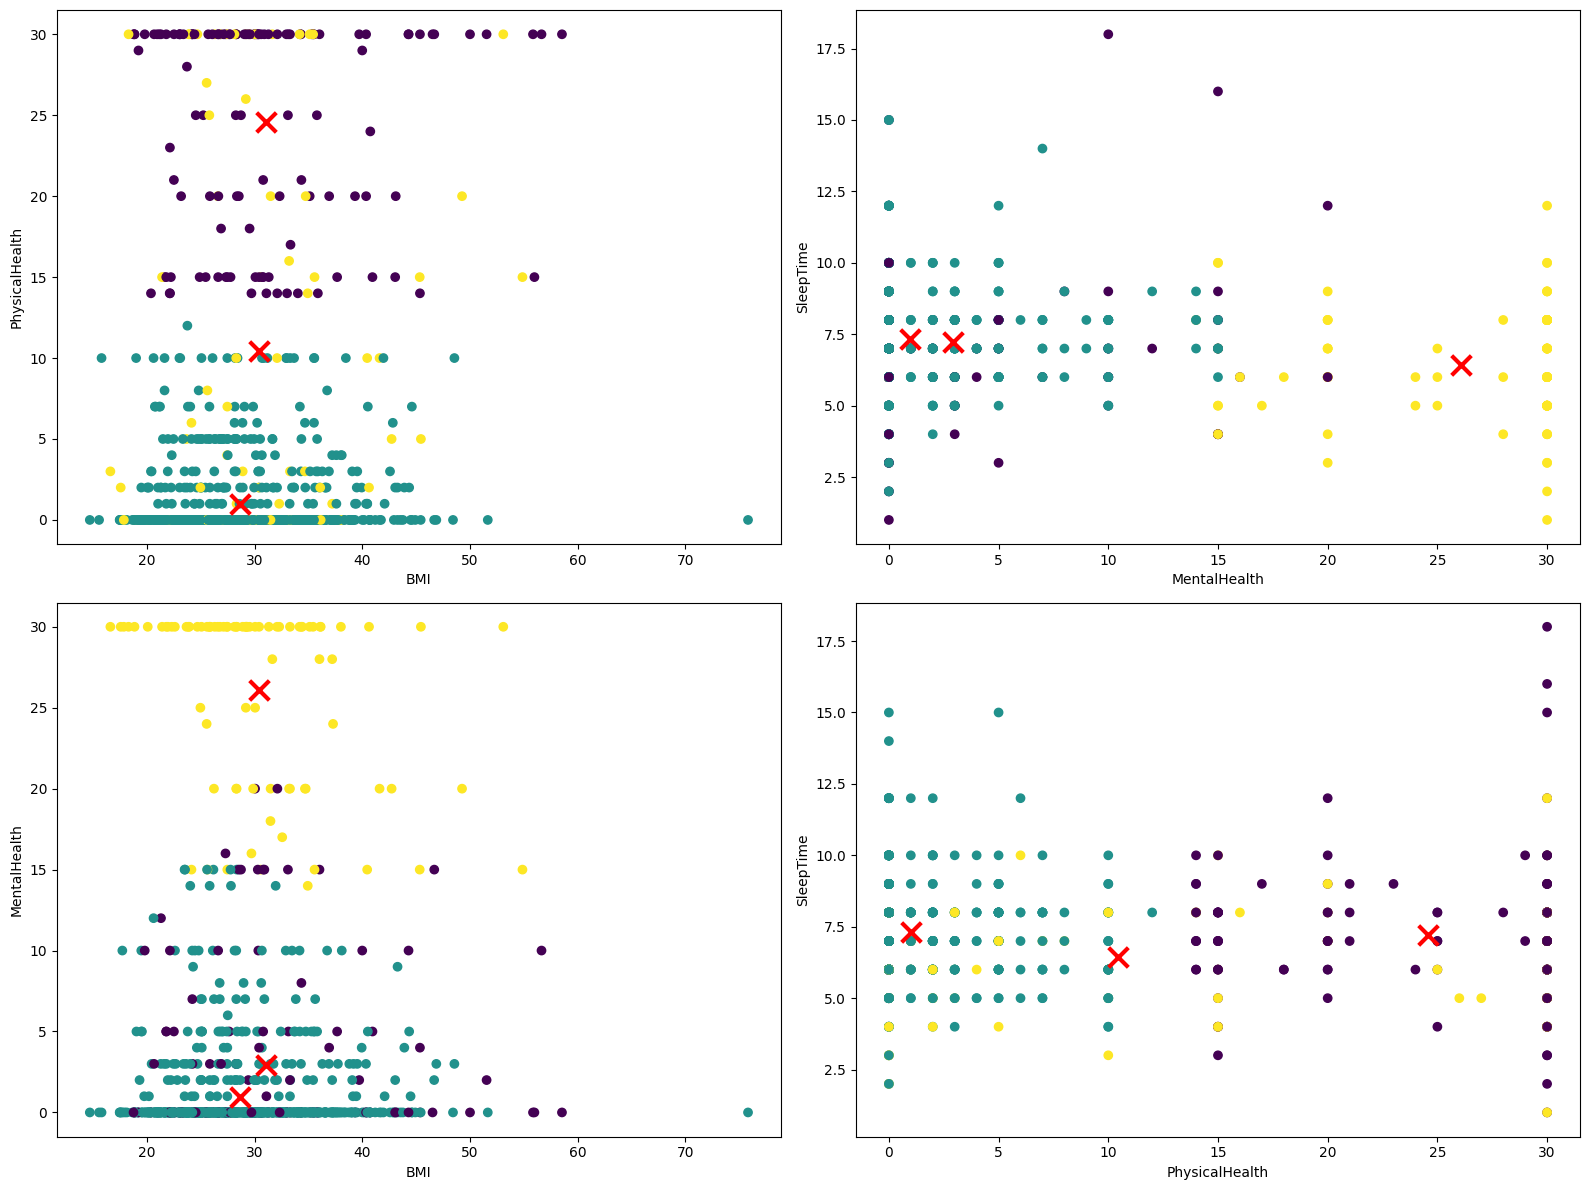

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def run_kmeans(data, n_clusters, random_state):
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    labels = kmeans.fit_predict(data)
    centers = kmeans.cluster_centers_
    return labels, centers

def print_cluster_result(data, n_clusters, labels):
    for i in range(n_clusters):
        cluster_indices = [index for index, label in enumerate(labels) if label == i]
        print(f"Cluster {i+1} ({len(cluster_indices)}):")
        print(", ".join(map(str, cluster_indices)))
        print("--------")

def draw_cluster_results(data, feature_x, feature_y, labels, centers, subplot):
    subplot.scatter(data.iloc[:, feature_x], data.iloc[:, feature_y], c=labels, cmap='viridis')
    subplot.scatter(centers[:, feature_x], centers[:, feature_y], marker='x', s=200, linewidths=3, color='r')
    subplot.set_xlabel(data.columns[feature_x])
    subplot.set_ylabel(data.columns[feature_y])

# Применение K-means
random_state = 9
n_clusters = 3
labels, centers = run_kmeans(X, n_clusters, random_state)
print_cluster_result(X, n_clusters, labels)
display(centers)
display(df['HeartDisease'])

# Визуализация результатов кластеризации
plt.figure(figsize=(16, 12))
draw_cluster_results(X, 0, 1, labels, centers, plt.subplot(2, 2, 1))
draw_cluster_results(X, 2, 3, labels, centers, plt.subplot(2, 2, 2))
draw_cluster_results(X, 0, 2, labels, centers, plt.subplot(2, 2, 3))
draw_cluster_results(X, 1, 3, labels, centers, plt.subplot(2, 2, 4))
plt.tight_layout()
plt.show()

In [9]:
from sklearn.decomposition import PCA

# Понижение размерности до n=2 с использованием PCA
reduced_data = PCA(n_components=2).fit_transform(X)

# Вывод результатов понижения размерности
print(reduced_data)



[[  9.31321501  26.77646868]
 [ -6.91783938   1.05243249]
 [ 25.54665344  17.10779298]
 ...
 [ -5.04837552  -0.86215887]
 [ 22.80197652 -17.26780336]
 [ -6.07756748  -0.15069417]]


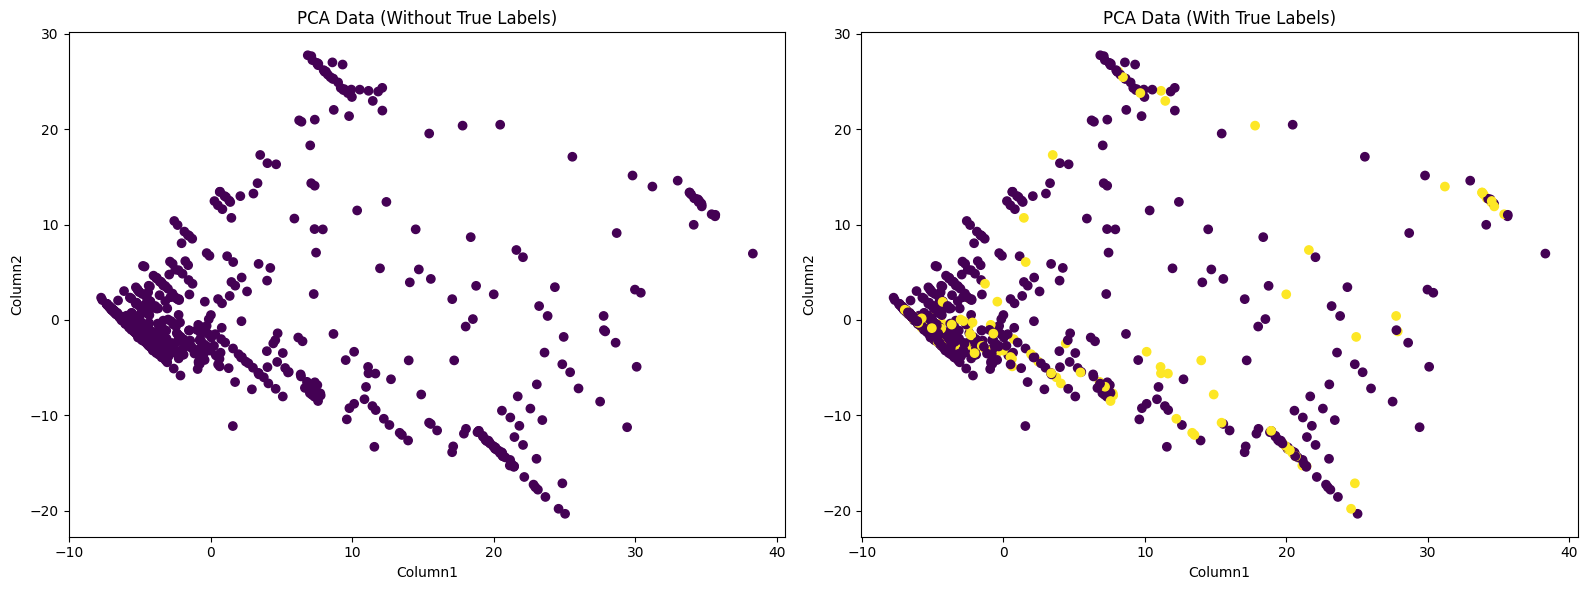

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Визуализация данных после понижения размерности
plt.figure(figsize=(16, 6))

# Визуализация данных без учета истинных меток
draw_data_2d(
    pd.DataFrame({"Column1": reduced_data[:, 0], "Column2": reduced_data[:, 1]}),
    0,
    1,
    labels=[0] * len(reduced_data),  # Добавляем метки для визуализации
    subplot=plt.subplot(1, 2, 1),
)
plt.title('PCA Data (Without True Labels)')

# Визуализация данных с учетом истинных меток
draw_data_2d(
    pd.DataFrame({"Column1": reduced_data[:, 0], "Column2": reduced_data[:, 1]}),
    0,
    1,
    df['HeartDisease'],
    plt.subplot(1, 2, 2),
)
plt.title('PCA Data (With True Labels)')

plt.tight_layout()
plt.show()

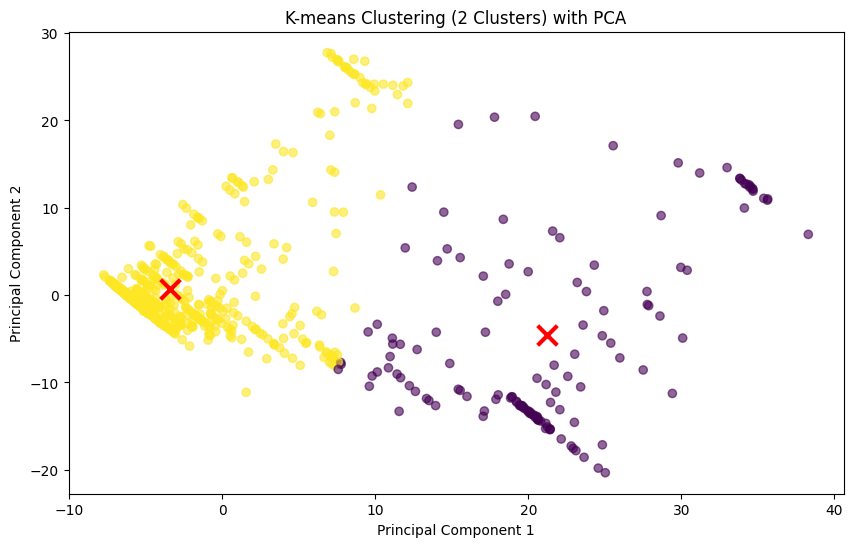

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Определение функции fit_kmeans
def fit_kmeans(data, n_clusters, random_state):
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    kmeans.fit(data)
    return kmeans

# Определение функции draw_clusters
def draw_clusters(data, kmeans):
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    
    plt.figure(figsize=(10, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', alpha=0.6)
    plt.scatter(centers[:, 0], centers[:, 1], marker='x', s=200, linewidths=3, color='r')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('K-means Clustering (2 Clusters) with PCA')
    plt.show()

# Применение K-means для двух кластеров на пониженных данных
kmeans = fit_kmeans(reduced_data, 2, random_state)
draw_clusters(reduced_data, kmeans)

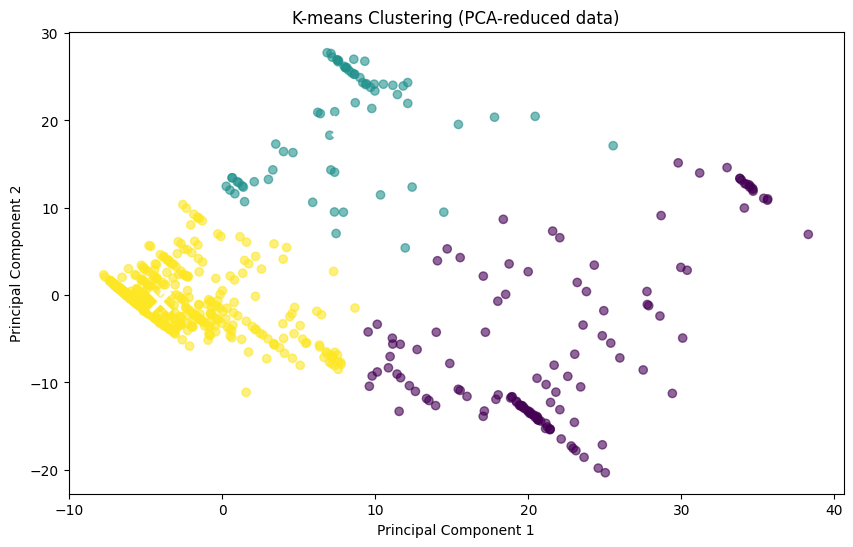

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Определение функции fit_kmeans
def fit_kmeans(data, n_clusters, random_state):
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    kmeans.fit(data)
    return kmeans

# Определение функции draw_clusters
def draw_clusters(data, kmeans):
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    
    plt.figure(figsize=(10, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', alpha=0.6)
    plt.scatter(centers[:, 0], centers[:, 1], marker='x', s=200, linewidths=3, color='white')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('K-means Clustering (PCA-reduced data)')
    plt.show()

# Применение K-means для трех кластеров на пониженных данных
kmeans = fit_kmeans(reduced_data, 3, random_state)
draw_clusters(reduced_data, kmeans)

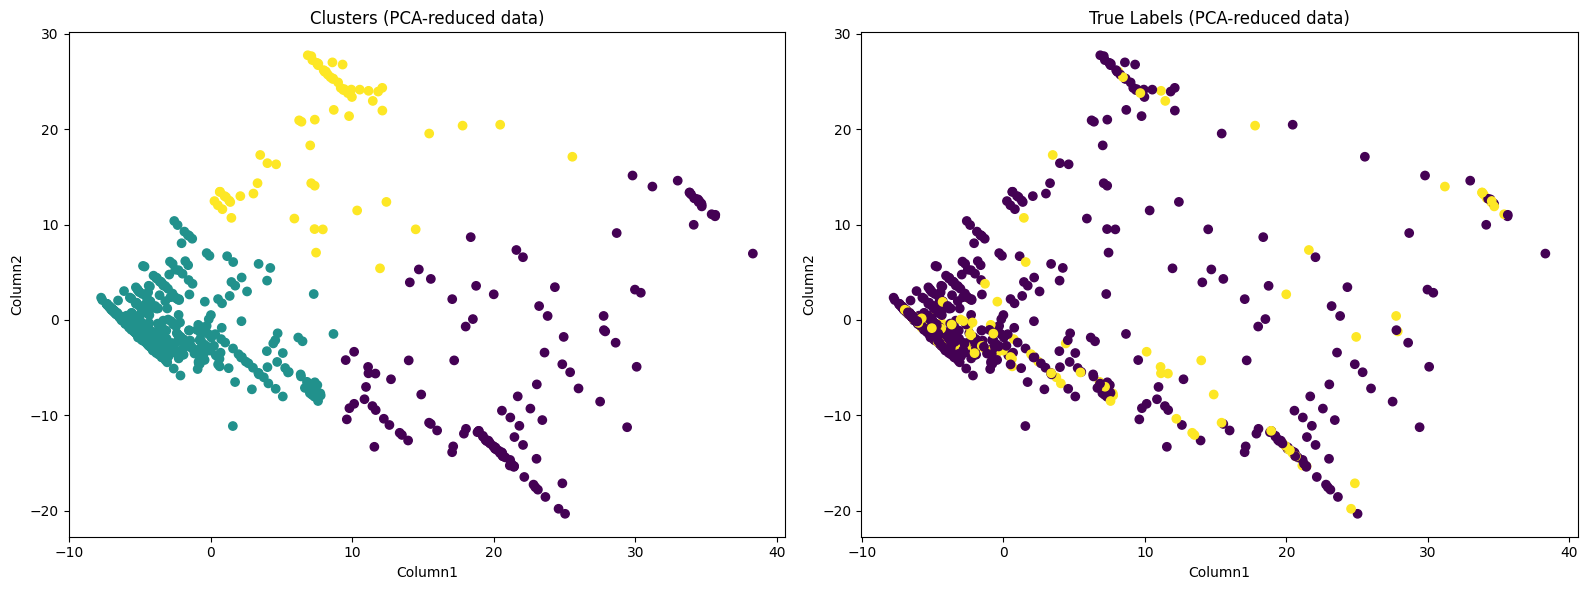

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Преобразование меток кластеров
labels = [2 if val == 1 else 1 if val == 2 else val for val in kmeans.labels_]

# Визуализация результатов кластеризации и истинных меток
plt.figure(figsize=(16, 6))

# Визуализация кластеров на основе признаков 0 и 1
draw_data_2d(
    pd.DataFrame({"Column1": reduced_data[:, 0], "Column2": reduced_data[:, 1]}),
    0,
    1,
    labels,
    plt.subplot(1, 2, 1),
)
plt.title('Clusters (PCA-reduced data)')

# Визуализация истинных меток на основе признаков 0 и 1
draw_data_2d(
    pd.DataFrame({"Column1": reduced_data[:, 0], "Column2": reduced_data[:, 1]}),
    0,
    1,
    df['HeartDisease'],
    plt.subplot(1, 2, 2),
)
plt.title('True Labels (PCA-reduced data)')

plt.tight_layout()
plt.show()

Clusters Range: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Inertias: [40898793.73610622, 20383039.394992765, 10558797.359806543, 8253581.349853665, 5211677.9440700915, 4725347.803894365, 3415392.2695708266, 2746581.745507652, 2327078.2781427936, 2038724.3739189352]


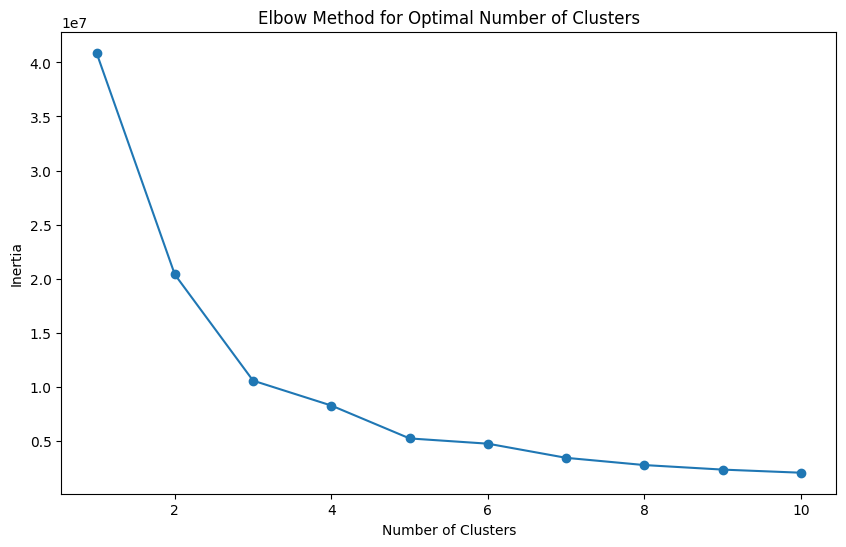

In [23]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Функция для расчета инерции для разного количества кластеров
def get_clusters_inertia(data, random_state, max_clusters=10):
    inertias = []
    clusters_range = range(1, max_clusters + 1)
    
    for n_clusters in clusters_range:
        kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)
    
    return inertias, clusters_range

# Функция для построения диаграммы локтя
def draw_elbow_diagram(inertias, clusters_range):
    plt.figure(figsize=(10, 6))
    plt.plot(clusters_range, inertias, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal Number of Clusters')
    plt.show()

# Применение K-means для пониженных данных
random_state = 42
max_clusters = 10

# Расчет инерции для разного количества кластеров
inertias, clusters_range = get_clusters_inertia(reduced_data, random_state, max_clusters)

# Вывод диапазона кластеров и инерции
print("Clusters Range:", list(clusters_range))
print("Inertias:", inertias)

# Построение диаграммы локтя
draw_elbow_diagram(inertias, clusters_range)